Importing the libraries
---
---

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Loading the Data
---
---

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
#Dictionary of labels:
label_dict = {0:'Airplane',1:'Automobile',2:'Bird',3:'Cat',4:'Deer',5:'Dog',6:'Frog',7:'Horse',8:'Ship',9:'Truck'}

Some Visuals
---
---

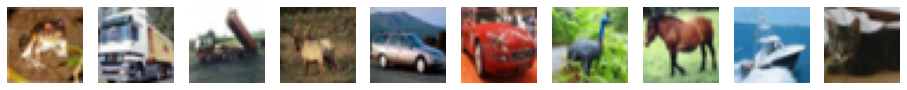

In [ ]:
#Printing 10 images from dataset
def show_10_images():
  f, axarr = plt.subplots(1,10)
  f.set_size_inches(16, 6)
  for i in range(10):
      img = X_train[i]
      axarr[i].axis('off')
      axarr[i].imshow(img)
  plt.show()
show_10_images()

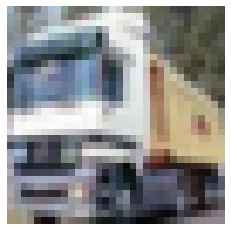

Label:  Truck


In [ ]:
#Printing an image from training dataset when provided with index
def show(index):
    plt.axis('off')
    plt.imshow(X_train[index])
    plt.show()
    print('Label: ',label_dict[y_train[index,0]])
show(1)

In [ ]:
#Printing Dataset shape:
print('Shape of:',
      '\nX_train: ',X_train.shape,
      '\nX_test: ',X_test.shape,
      '\ny_train: ',y_train.shape,
      '\ny_test: ',y_test.shape)

Shape of: 
X_train:  (50000, 32, 32, 3) 
X_test:  (10000, 32, 32, 3) 
y_train:  (50000, 1) 
y_test:  (10000, 1)


In [ ]:
#Printing Shape of 1st element of image and label
print(
    'X_train[0]:\n',X_train[0],
    '\ny_train[0]:\n',y_train[0])

X_train[0]:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]] 
y_train[0]:
 [6]


Preprocessing
---
---

In [ ]:
#Checking imbalance
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))  #the result proves that there is no imbalance 

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

In [ ]:
#Normalisation of Data - Division is done by 255 to bring the pixel values between 0 and 1 because the original pixel values range from 0 to 255
X_train = X_train/ 255.0
X_test = X_test/ 255.0

print(X_train)


[[[[0.55517272 0.58340184 0.59281155]
   [0.5555908  0.59435295 0.58143223]
   [0.61300108 0.58848104 0.52718093]
   ...
   [0.67959661 0.56776426 0.46453439]
   [0.685736   0.56392763 0.46016494]
   [0.67630692 0.56663553 0.47067306]]

  [[0.49236596 0.61545745 0.61545745]
   [0.         0.         0.        ]
   [0.91381155 0.40613847 0.        ]
   ...
   [0.76431432 0.54682651 0.34176657]
   [0.7754459  0.54085723 0.32581761]
   [0.76098548 0.54266997 0.3555424 ]]

  [[0.61695492 0.59227672 0.51824213]
   [0.91615733 0.40081883 0.        ]
   [0.86701902 0.47774517 0.14155413]
   ...
   [0.77007489 0.5481889  0.32630292]
   [0.77530769 0.54271539 0.32304487]
   [0.79131072 0.52996039 0.30490872]]

  ...

  [[0.7291292  0.59592291 0.33652117]
   [0.78859314 0.60027239 0.13339386]
   [0.7718785  0.62763858 0.10135778]
   ...
   [0.7288632  0.60586754 0.31887765]
   [0.86970783 0.4814454  0.10871348]
   [0.80220201 0.51462016 0.30271774]]

  [[0.72917534 0.5630854  0.38889351]
   [0.7

In [ ]:
#One-Hot Encoding of the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Shape of:',
      '\ny_train: ',y_train.shape,
      '\ny_test: ',y_test.shape)

Shape of: 
y_train:  (50000, 10) 
y_test:  (10000, 10)


Model
---
---

In [ ]:
# Declare the Sequential model
model = Sequential([
                    Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3),padding='same'),
                    Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3),padding='same'),
                    MaxPool2D(2,padding='same'),
                    Dropout(0.25),
                    Conv2D(64, kernel_size=3, activation='relu',padding='same'),
                    Conv2D(64, kernel_size=3, activation='relu',padding='same'),
                    MaxPool2D(2,padding='same'),
                    Dropout(0.25),
                    Conv2D(128, kernel_size=3, activation='relu',padding='same'),
                    Conv2D(128, kernel_size=3, activation='relu',padding='same'),
                    MaxPool2D(2,padding='same'),
                    Dropout(0.25),
                    Flatten(),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [ ]:
#Compiling and training the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.7449 - accuracy: 0.3726 - val_loss: 160.6109 - val_accuracy: 0.3579
Epoch 2/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.4643 - accuracy: 0.4848 - val_loss: 143.8122 - val_accuracy: 0.3741
Epoch 3/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.3449 - accuracy: 0.5291 - val_loss: 178.6481 - val_accuracy: 0.3348
Epoch 4/25
50000/50000 [==============================] - 8s 159us/step - loss: 1.2588 - accuracy: 0.5589 - val_loss: 177.3037 - val_accuracy: 0.3316
Epoch 5/25
50000/50000 [==============================] - 8s 159us/step - loss: 1.1950 - accuracy: 0.5857 - val_loss: 180.1466 - val_accuracy: 0.3530
Epoch 6/25
50000/50000 [==============================] - 8s 162us/step - loss: 1.1417 - accuracy: 0.6030 - val_loss: 180.2921 - val_accuracy: 0.3605
Epoch 7/25
50000/50000 [==========================

In [ ]:
#history prints the val_loss and val_acc of each epoch
print(model.history.history)

#evaluate gives the final val_loss and val_accuracy
model.evaluate(X_test,y_test)

{'val_loss': [1.215300033378601, 0.9995113476753235, 0.8517898586273194, 0.829571143913269, 0.7219730491638183, 0.7484030968666077, 0.6950179080963135, 0.6802103327274323, 0.6616059755325318, 0.703116536283493, 0.6741933079242707, 0.702802725315094, 0.6769662162303924, 0.6346144435167312, 0.6539522553443908], 'val_accuracy': [0.5687999725341797, 0.6456000208854675, 0.7028999924659729, 0.7142999768257141, 0.748199999332428, 0.7425000071525574, 0.7584999799728394, 0.7644000053405762, 0.7785999774932861, 0.765999972820282, 0.777400016784668, 0.7674000263214111, 0.7784000039100647, 0.7943000197410583, 0.7903000116348267], 'loss': [1.5704293529891968, 1.1061186196899413, 0.9334356497764588, 0.8332933214569092, 0.762468992061615, 0.7116606083106994, 0.6801736684417724, 0.6539373837089538, 0.6294640413093567, 0.6125861366844177, 0.590478581533432, 0.57791594622612, 0.5611249551963806, 0.5543563587093353, 0.5482402088356018], 'accuracy': [0.42012, 0.60676, 0.6683, 0.70572, 0.73354, 0.74768, 0.

[0.6539522553443908, 0.7903000116348267]

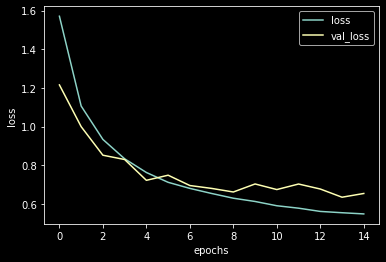

In [ ]:
#Graph to compare Validation loss and Loss with respect to number of epochs
plt.style.use('dark_background')
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

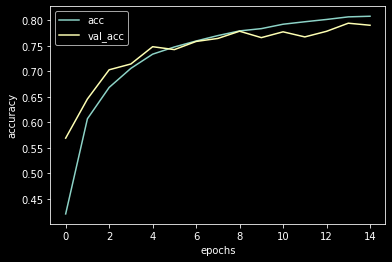

In [ ]:
#Graph to compare Validation accuracy and accuracy with respect to number of epochs
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Predictions
---
---

In [ ]:
#Predictions 
preds = model.predict(X_test)
print(preds)

[[1.7278525e-03 1.5227037e-02 1.5838451e-03 ... 1.3578459e-04
  1.9370472e-03 7.2557395e-03]
 [2.0543997e-04 9.4877291e-01 4.0707423e-08 ... 3.6600425e-09
  5.0996203e-02 2.2117969e-05]
 [9.8490931e-02 7.9889804e-02 1.5554997e-03 ... 2.4094591e-03
  7.4623775e-01 9.0611521e-03]
 ...
 [1.2622008e-08 2.3587883e-09 1.5607371e-04 ... 5.3397857e-04
  3.4826094e-08 6.4420604e-08]
 [6.3572204e-01 9.7939089e-02 1.9935758e-03 ... 1.2867227e-04
  1.2347716e-03 1.2348003e-04]
 [6.8504064e-11 9.4192904e-13 2.5187950e-09 ... 9.9947852e-01
  5.1991058e-14 1.6696554e-13]]


The predicted labels and actual labels in order are:


Index	Predict		Actual
998 	 Cat 		 Cat 

30 	 Frog 		 Frog 

2 	 Ship 		 Ship 

100 	 Horse 		 Deer 



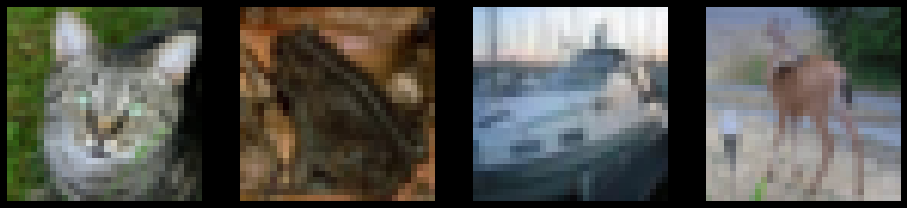

In [ ]:
#Predicting the images from list
def predict_lst(lst):
    i = 0
    print('The predicted labels and actual labels in order are:\n')
    print('\nIndex\tPredict\t\tActual')
    for index in lst:
        print(index,'\t',label_dict.get(np.argmax(preds[index])),'\t\t',label_dict.get(np.argmax(y_test[index])),'\n')
    f, axarr = plt.subplots(1,len(lst))
    f.set_size_inches(16, 6)
    for index in lst:
      axarr[i].axis('off')
      axarr[i].imshow(X_test[index])
      i +=1
    plt.show()
predict_lst([998,30,2,100])

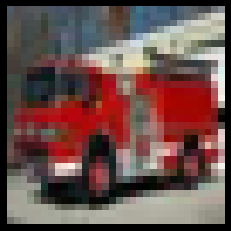

Predicted label:  Truck
Actual Label:  Truck


In [ ]:
#Predicting the label when index is provided
def predict_index(index):
    plt.axis('off')
    plt.imshow(X_test[index])
    plt.show()
    print('Predicted label: ',label_dict.get(np.argmax(preds[index])))
    print('Actual Label: ',label_dict.get(np.argmax(y_test[index])))
predict_index(23)

In [ ]:
#converting back to 1 column array
preds=np.argmax(preds, axis=1)
y_test=np.argmax(y_test, axis=1)
#Checking if predictions have been converted
preds

array([3, 1, 8, ..., 5, 0, 7])

In [ ]:
#Classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.89      0.91      0.90      1000
           2       0.72      0.68      0.70      1000
           3       0.57      0.67      0.62      1000
           4       0.76      0.79      0.77      1000
           5       0.74      0.67      0.71      1000
           6       0.77      0.88      0.82      1000
           7       0.87      0.82      0.84      1000
           8       0.91      0.84      0.87      1000
           9       0.90      0.83      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

